## Final Project Submission

Please fill out: 
* Student name: David Bartholomew
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:


In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, Normalizer
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest,f_regression
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from scipy.stats import pearsonr
from itertools import combinations
%matplotlib inline

/Users/dbarth411/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Import and preview the data
df = pd.read_csv('kc_house_data.csv')
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

None

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#Preview data statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
#Drop id column as it isn't relevant for our analysis
df.drop(columns=['id'], axis=1, inplace=True)

In [5]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [6]:
#Find missing values
df.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [8]:
#Fill missing values for waterfront
df.waterfront.fillna(0.0, inplace=True)

In [9]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [10]:
df.view.fillna(0.0, inplace=True)

In [11]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
518.0         1
2400.0        1
2196.0        1
1281.0        1
2570.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [12]:
df['sqft_basement'] = df.sqft_basement.replace('?', 0.0)
df.sqft_basement.value_counts()

0.0       12826
0.0         454
600.0       217
500.0       209
700.0       208
          ...  
417.0         1
2360.0        1
2196.0        1
518.0         1
2850.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [13]:
#Convert sqft_basement to float
df['sqft_basement']= df.sqft_basement.astype('float64')

In [14]:
#Convert sqft_basement to binary, basement or no basement
#values = df.sqft_basement.values
#df['sqft_basement'] = np.where(values >= 1, 1, 0)

#Rename column as sqft is no longer represented
#df.rename(columns={'sqft_basement':'basement'}, inplace=True)

In [15]:
#Convert date column to 2 separate columns for month and year
date = df['date'].str.split('/', expand=True)
df['month_sold'] = date[0].astype('float64')
df['year_sold'] = date[2].astype('float64')

#Drop original date column
df.drop(columns=['date'], axis=1, inplace=True)

The year renovated column has a significant amount of zeros. Rather than dropping the data, we will make this binary whether a house was sold within 10 years of a renovation or not.

In [16]:
df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [17]:
#Fill missing values
df.yr_renovated.fillna(0.0, inplace=True)

In [18]:
#Create renovated column
df['renovated'] = df.year_sold - df.yr_renovated

In [19]:
#Replace any values less than 10 with 1, and any values over 10 with 0
values = df.renovated.values
df['renovated'] = np.where(values <= 10, 1, 0)

#Drop yr_renovated column
df.drop(columns=['yr_renovated'], axis=1, inplace=True)

In [20]:
#Create age column by subtracting year built from 2015
df['age'] = 2015 - df['yr_built']

#Drop the yr_built column
df.drop(columns=['yr_built'], axis=1, inplace=True)

In [21]:
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   view           21597 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  zipcode        21597 non-null  int64  
 13  lat            21597 non-null  float64
 14  long           21597 non-null  float64
 15  sqft_living15  21597 non-null  int64  
 16  sqft_lot15     21597 non-null  int64  
 17  month_sold     21597 non-null  float64
 18  year_s

None

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,renovated,age
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,0.0,98178,47.5112,-122.257,1340,5650,10.0,2014.0,0,60
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,400.0,98125,47.7210,-122.319,1690,7639,12.0,2014.0,0,64
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,0.0,98028,47.7379,-122.233,2720,8062,2.0,2015.0,0,82
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,910.0,98136,47.5208,-122.393,1360,5000,12.0,2014.0,0,50
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,0.0,98074,47.6168,-122.045,1800,7503,2.0,2015.0,0,28


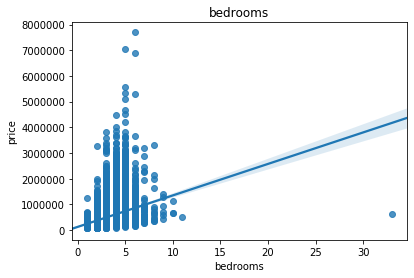

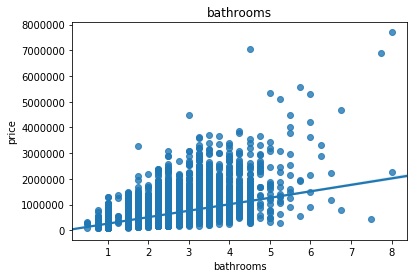

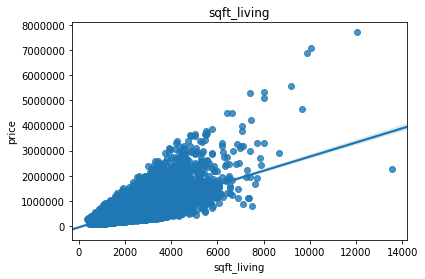

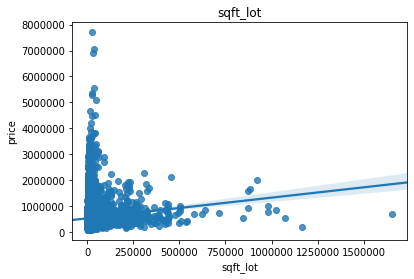

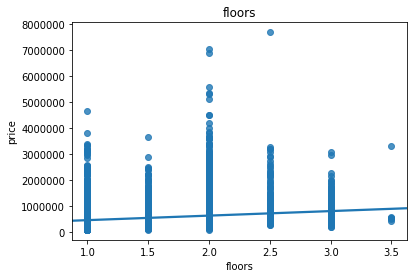

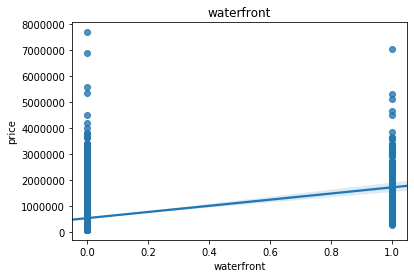

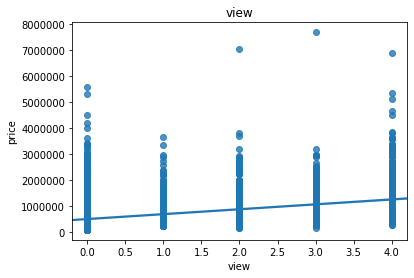

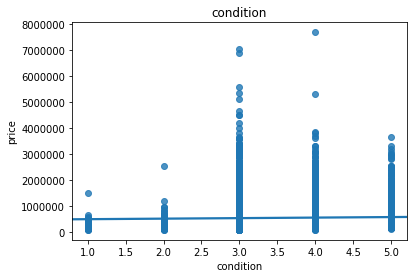

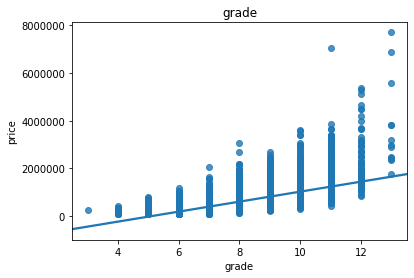

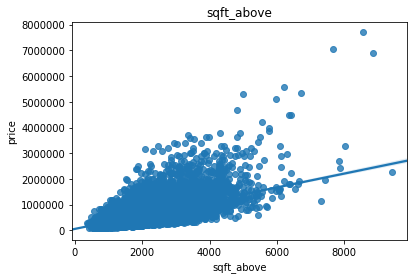

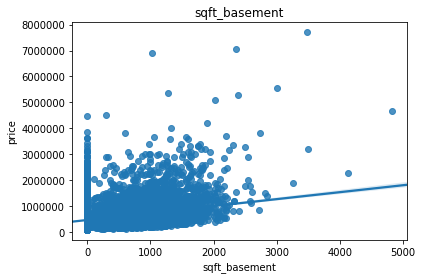

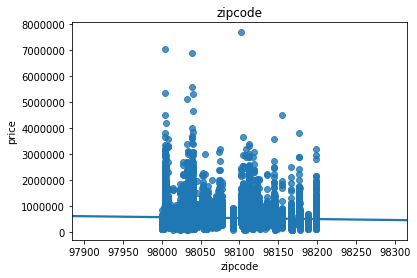

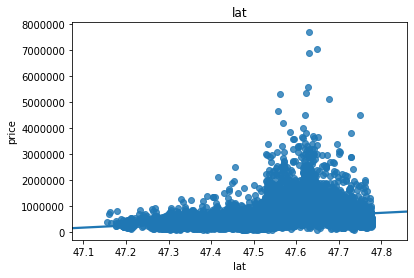

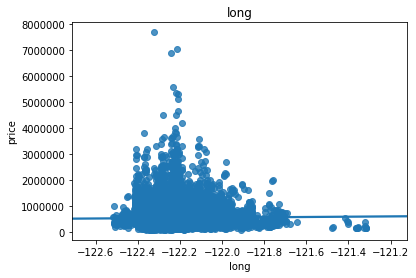

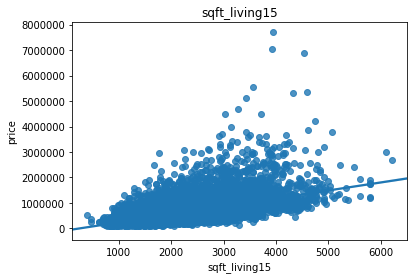

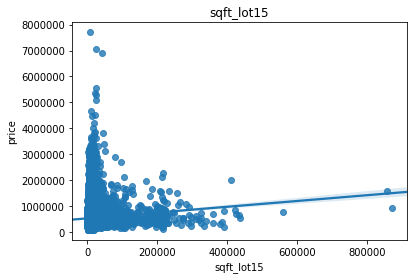

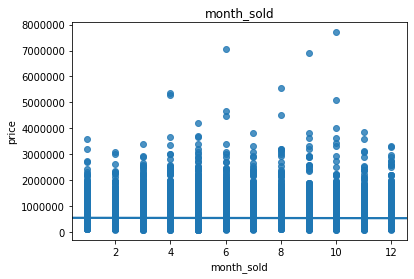

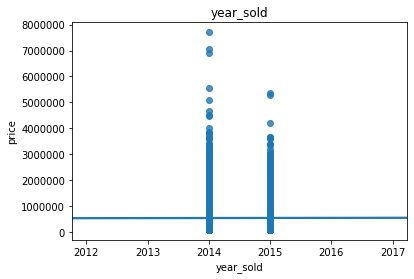

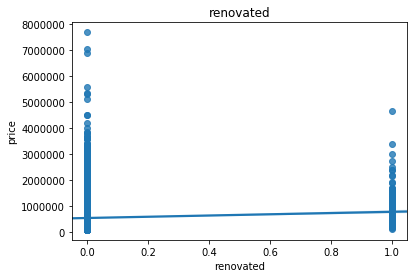

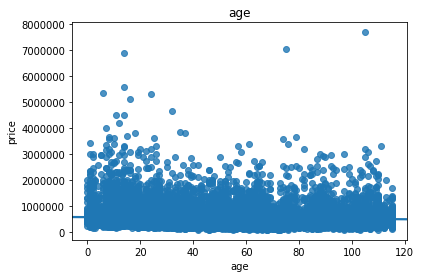

In [22]:
#Preview the relationship between features and target variables
X = df.drop(columns=['price'], axis=1)
for col in X.columns:
    plt.subplots(1, 1)
    sns.regplot(X[col], df.price)
    plt.title(col)

There are several features where there is a clear linear relationship with price, but there are some features where the relationship is not so clear. We can further look at the correlation between all of our features and price to get a better idea of which features have a linear relationship with the dependent variable. Prior to doing so, let's look at a map of these houses based on the latitude and longitude coordinates given to get an idea of how price varies by location.

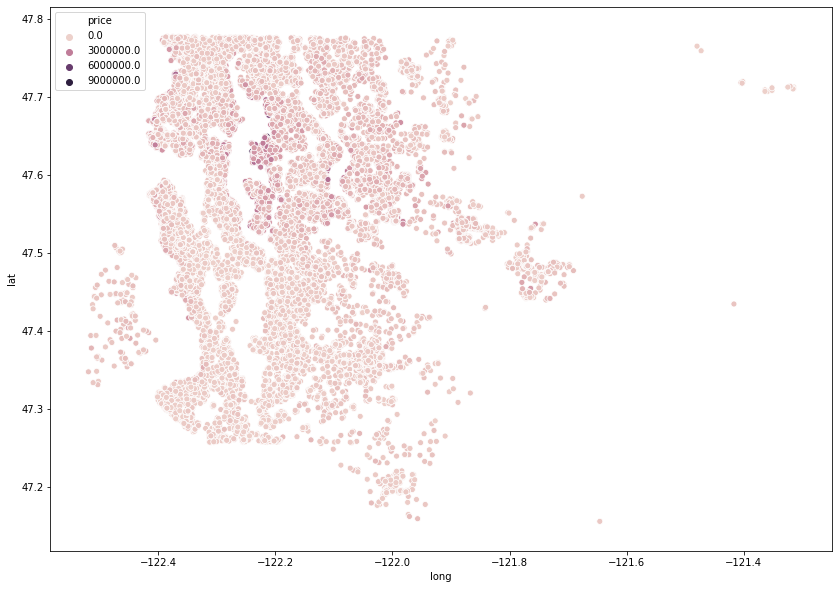

In [23]:
plt.figure(figsize=(14, 10))
sns.scatterplot(df['long'], df['lat'], hue=df['price']);

It seems that homes that are closer to the Bellevue and downtown Seattle areas are higher priced, and prices tend to go down the further away from these areas. Using the geopy library, we will create a column that calculates the distance in miles from Bellevue and include this in our model.

In [24]:
from geopy import distance

lat_long = df['lat'].astype(str) + ',' + df['long'].astype(str)
lat_long = list(map(eval, lat_long)) 

Bellevue = (47.557, -122.1277)
miles = []
for i in lat_long:
    miles.append(round(distance.distance(i, Bellevue).miles, 1))
df['distance'] = miles

In [25]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,renovated,age,distance
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,98178,47.5112,-122.257,1340,5650,10.0,2014.0,0,60,6.8
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,98125,47.7210,-122.319,1690,7639,12.0,2014.0,0,64,14.4
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,98028,47.7379,-122.233,2720,8062,2.0,2015.0,0,82,13.4
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,98136,47.5208,-122.393,1360,5000,12.0,2014.0,0,50,12.7
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,98074,47.6168,-122.045,1800,7503,2.0,2015.0,0,28,5.7


Now that we have our data cleaned, we will look at how each predictor correlates with price and we'll plot the correlations as well.

In [26]:
X = df.drop(columns=['price'], axis=1)
y = df.price

correlation_list = []
for col in X.columns:
    correlation_list.append(pearsonr(X[col], y)[0])
    
correlations = {}
for i, j in zip(X.columns, correlation_list):
    correlations[i] = round(j, 2)
sorted_correlations = pd.DataFrame(sorted(correlations.items(), key=lambda x: x[1], reverse=True), columns=['feature', 'correlations'])
sorted_correlations['feature'] = sorted_correlations['feature'].astype('string')
sorted_correlations

,feature,correlations
0,sqft_living,0.70
1,grade,0.67
2,sqft_above,0.61
3,sqft_living15,0.59
4,bathrooms,0.53
5,view,0.39
6,sqft_basement,0.32
7,bedrooms,0.31
8,lat,0.31
9,floors,0.26


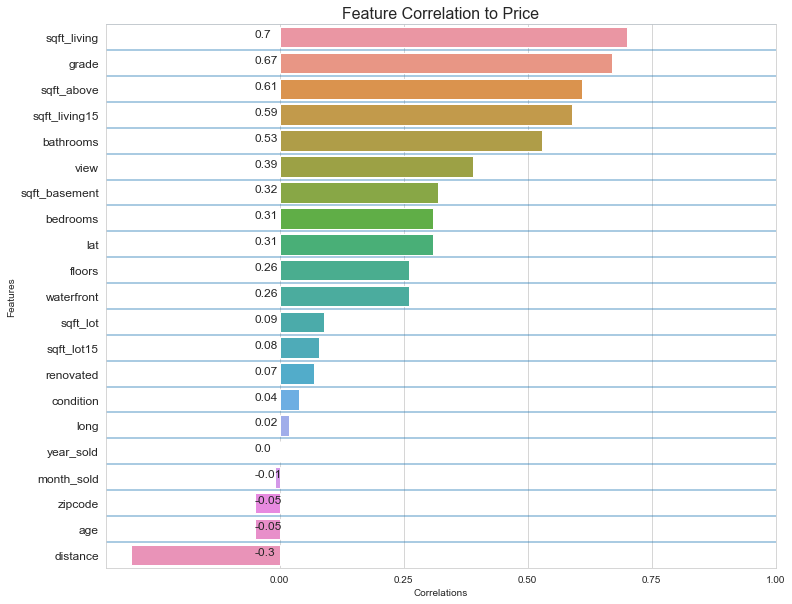

In [27]:
#Plot the feature correlation to price
plt.figure(figsize=(12, 10))
sns.set_style('whitegrid')
sns.barplot(sorted_correlations['correlations'], sorted_correlations['feature'])
plt.title('Feature Correlation to Price', fontsize=16)
plt.xlabel('Correlations')
plt.ylabel('Features')
plt.yticks(fontsize=12)
plt.xticks(np.linspace(0, 1, 5))
for ind, val in enumerate(sorted_correlations['correlations']):
    plt.text(x= -0.05, y= ind, s= val, fontsize=12)
    plt.axhline(ind - .5, alpha=0.5)
plt.show()

There are some features with almost no correlation to price, but rather than dropping these features right away, we can build a model and potentially engineer new features as we move along.

# Model 1: Using All Features

In [28]:
#Separate features and target columns
def linear_model(dataframe):
    #Create feature and target columns
    X = dataframe.drop(columns=['price'], axis=1)
    y = dataframe.price
    
    #Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)
    
    #Fit the model
    linreg = LinearRegression()
    model = linreg.fit(X_train, y_train)
    model
    
    #View model accuracy
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print('Training Score:', round(train_score, 2))
    print('Test Score:', round(test_score, 2))
    print('Coefficients:', model.coef_)
    
    #View model summary in statsmodels
    X_train = sm.add_constant(X_train)
    smmodel = sm.OLS(y_train, X_train).fit()
    print(smmodel.summary())
    return smmodel

In [29]:
model = linear_model(df)
model

Training Score: 0.71
Test Score: 0.7
Coefficients: [-3.45826400e+04  4.03515920e+04  1.13282106e+02  1.55341817e-01
  6.31597729e+03  6.74992784e+05  5.61137491e+04  2.60721323e+04
  9.20856748e+04  6.97567226e+01  3.11813544e+01 -5.38595672e+02
  5.49872464e+05 -2.83690594e+05  1.21354593e+01 -2.02124275e-01
  1.27779217e+03  3.64955873e+04  9.65381871e+04  2.46493888e+03
 -8.00939810e+03]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     2054.
Date:                Wed, 23 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:48:00   Log-Likelihood:            -2.3506e+05
No. Observations:               17277   AIC:                         4.702e+05
Df Residuals:                   17255   BIC:         

There are a couple features with p_values that are insignificant, but before we drop these features from the data, let's check our residuals.

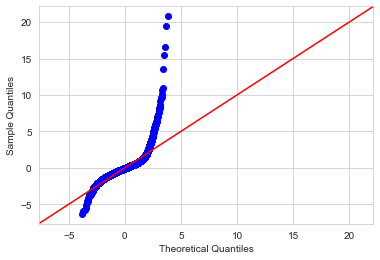

In [30]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Residuals are not normal, which violates are assumption of normality. We will try log transforming our dependent variable to help improve this.

# Model 2: Normalizing the Dependent Variable

In [31]:
df.price = df.price.map(np.log)

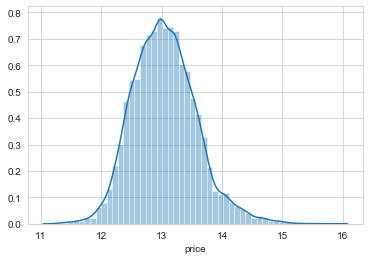

In [32]:
sns.distplot(df.price)

After the log transformation, the distribution still has heavy tails. We need to remove outliers in order to avoid high kurtosis.

In [33]:
df = df[(np.abs(stats.zscore(df.price)) < 3)]

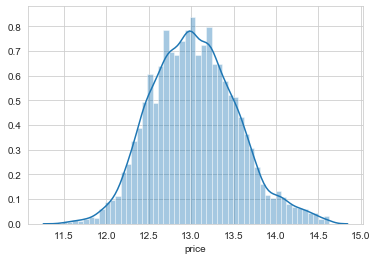

In [34]:
sns.distplot(df.price)

Although not perfect, the dependent variable is much closer to a normal distribution. Let's build a model with this transformation.

In [35]:
model = linear_model(df)
model

Training Score: 0.77
Test Score: 0.77
Coefficients: [-1.56867113e-02  6.91781679e-02  1.27502861e-04  4.89664784e-07
  8.00627643e-02  3.39934991e-01  6.71987224e-02  6.08186218e-02
  1.49366177e-01  1.58954203e-05  1.91907885e-05 -5.69814745e-04
  1.30104855e+00 -2.42964464e-01  7.97204181e-05  1.49356501e-07
  3.01611864e-03  6.77303981e-02  1.25391162e-01  3.31851063e-03
 -1.30173489e-02]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     2755.
Date:                Wed, 23 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:48:01   Log-Likelihood:                 101.94
No. Observations:               17142   AIC:                            -159.9
Df Residuals:                   17120   BIC:        

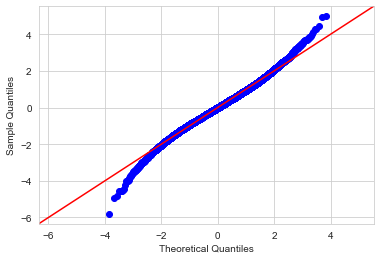

In [36]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Transforming the dependent variable improved our adjusted R-squared to .771, and our residuals resemble somewhat of a normal distribution. There is still an issue with high kurtosis, but we will deal with that later as we most likely will be dropping certain features. Several features have insignifanct p-values greater than 0.05, but let's look at collinearity first.

# Model 3: Dealing with Multicollinearity

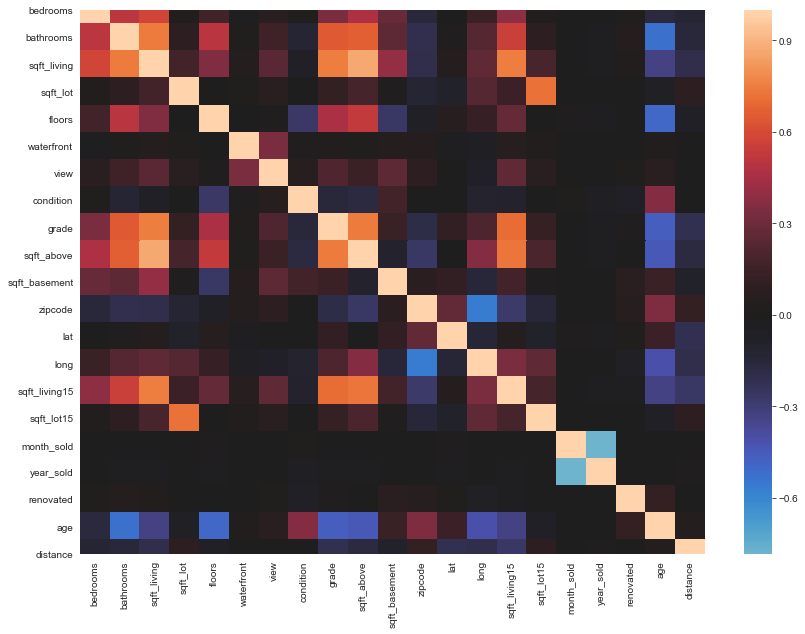

In [37]:
#View heatmap to get an idea of multicollinearity
X = df.drop(columns=['price'], axis=1)
plt.figure(figsize=(14, 10))
sns.heatmap(X.corr(), center=0);

This gives a general idea of which predictors are correlated with each other. To filter even further, let's take a look at variables with a correlation above 0.7.

In [38]:
abs(X.corr()) >= .7

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,renovated,age,distance
bedrooms,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
grade,False,False,True,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,False,False,False


There are several predictors with a correlation above 0.7. We can get an even clearer picture by returning highly correlated pairs with the stack method.

In [39]:
corr_df = X.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

# set index to pairs
corr_df.set_index(['pairs'], inplace = True)

#drop level columns
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
corr_df.columns = ['cc']

# drop duplicates
corr_df.drop_duplicates(inplace=True)

In [40]:
#Filter and correlations above .7 and below 1
corr_df[(corr_df.cc>.70) & (corr_df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.868972
"(year_sold, month_sold)",0.782581
"(sqft_living15, sqft_living)",0.755060
"(sqft_living, grade)",0.751287
"(grade, sqft_above)",0.745224
"(sqft_living, bathrooms)",0.744018
"(sqft_above, sqft_living15)",0.727863
"(sqft_lot15, sqft_lot)",0.717463
"(sqft_living15, grade)",0.705359


There are several features that seem to have multicollinearity. Rather than just dropping some of these features, let's first look at the variance inflation factor to understand the severity of the multicollinearity.

In [41]:
#Create dictionary of features and their variance inflation factor
X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_dict = dict(zip(X.columns, vif))
vif_dict

{'const': 52846304.00405066,
 'bedrooms': 1.6613301807691296,
 'bathrooms': 3.216298948525226,
 'sqft_living': 138.87176912404146,
 'sqft_lot': 2.101341542235843,
 'floors': 2.0304118301877,
 'waterfront': 1.1403124808114846,
 'view': 1.3501011510118441,
 'condition': 1.238232542493966,
 'grade': 3.3050306849735356,
 'sqft_above': 116.3264517523677,
 'sqft_basement': 33.22220329667897,
 'zipcode': 1.665924409564632,
 'lat': 1.2308687146292363,
 'long': 1.8979110406416881,
 'sqft_living15': 3.0003863126522003,
 'sqft_lot15': 2.1461931065755184,
 'month_sold': 2.586991577234397,
 'year_sold': 2.5963959039957847,
 'renovated': 1.0491535715544547,
 'age': 2.285095231511207,
 'distance': 1.210578625418979}

Several features have a variance inflation factor above 5, which tells us that the variance is over 500% bigger than what we would expect if there was no multicollinearity. Typically, a VIF over 5 signifies high correlation among features. Let's look at which features have a VIF over 5.

In [42]:
#Create a list of columns to drop with a vif cutoff of 5
new_dict = {}
for (key, value) in vif_dict.items():
    if value >= 5:
        new_dict[key] = value
columns_to_drop = list(new_dict.keys())
columns_to_drop = columns_to_drop[1:]
columns_to_drop

['sqft_living', 'sqft_above', 'sqft_basement']

Sqft_living, sqft_above, and sqft_basement are all over a VIF of 5. We'll remove sqft_above and sqft_basement, then recheck our VIF.

In [43]:
#Drop sqft_above
df = df.drop(columns=['sqft_above', 'sqft_basement'], axis=1)

In [44]:
X = df.drop(columns=['price'], axis=1)
X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_dict = dict(zip(X.columns, vif))
vif_dict

{'const': 52764862.47170076,
 'bedrooms': 1.6611540493875332,
 'bathrooms': 3.1363730784488286,
 'sqft_living': 4.909373162643542,
 'sqft_lot': 2.0994231962129217,
 'floors': 1.6239832358511144,
 'waterfront': 1.1390333307405323,
 'view': 1.3137401482300461,
 'condition': 1.2299705890967545,
 'grade': 3.2334578983235613,
 'zipcode': 1.6649582797930078,
 'lat': 1.2177132310035477,
 'long': 1.8305539609376924,
 'sqft_living15': 2.9291246508816333,
 'sqft_lot15': 2.145692334865359,
 'month_sold': 2.5864507478056944,
 'year_sold': 2.595965525620138,
 'renovated': 1.0481454950769233,
 'age': 2.2840697623332953,
 'distance': 1.2059051750582674}

Looks like dropping our sqft_above and sqft_basement brought the VIF down for sqft_living under 5. Let's build another model with these columns dropped.

In [45]:
model = linear_model(df)
model

Training Score: 0.77
Test Score: 0.77
Coefficients: [-1.56970699e-02  6.95057704e-02  1.44433668e-04  4.89009249e-07
  7.90252886e-02  3.39787025e-01  6.74230603e-02  6.09121217e-02
  1.49134010e-01 -5.69523826e-04  1.30190342e+00 -2.44626276e-01
  7.94059317e-05  1.47851004e-07  3.02479380e-03  6.77504808e-02
  1.25644086e-01  3.31765840e-03 -1.30305330e-02]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     3045.
Date:                Wed, 23 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:48:02   Log-Likelihood:                 101.49
No. Observations:               17142   AIC:                            -163.0
Df Residuals:                   17122   BIC:                            -8.003
Df Mod

Our adjusted R squared stays the same at .771, but sqft_lot15 is still showing as insignificant. We will remove this and rebuild our model.

# Model 4: Dropping Insignificant Features

In [46]:
#Drop sqft_lot15
df = df.drop(columns=['sqft_lot15', 'sqft_living'], axis=1)

In [47]:
#Build new model
model = linear_model(df)
model

Training Score: 0.76
Test Score: 0.75
Coefficients: [ 1.25422011e-02  1.24378015e-01  7.45909774e-07  7.47597529e-02
  3.34727517e-01  7.26629006e-02  6.25593530e-02  1.81338274e-01
 -5.07694139e-04  1.28908507e+00 -2.12260661e-01  1.38114895e-04
  3.37175839e-03  6.88750813e-02  1.22063096e-01  3.76104946e-03
 -1.27547091e-02]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     3170.
Date:                Wed, 23 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:48:02   Log-Likelihood:                -364.73
No. Observations:               17142   AIC:                             765.5
Df Residuals:                   17124   BIC:                             904.9
Df Model:                          17 

Our adjusted R squared still stays the same at .771 and all features are significant. Let's look at a QQ plot of our residuals again to determine if they resemble a normal distribution.

# Model 5: Normalizing Features

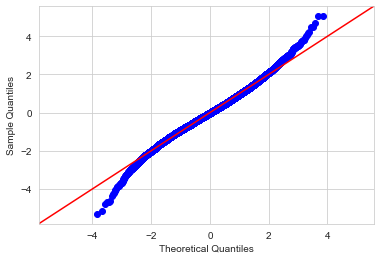

In [48]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Looking at the distribution of residuals, our kurtosis is still a little high at 3.892, which can be seen by the heavy tails in the qq plot above. We can view the distributions of our features to determine if there additional steps we can take to reduce kurtosis.

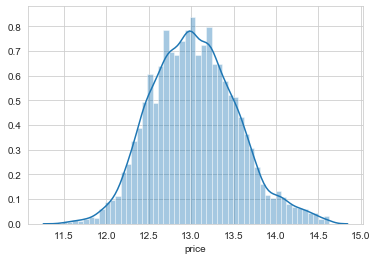

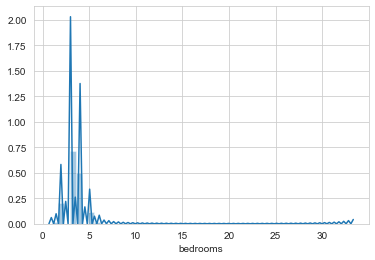

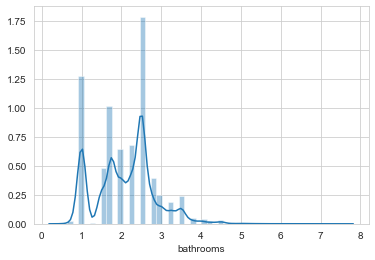

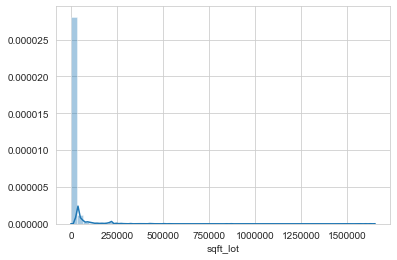

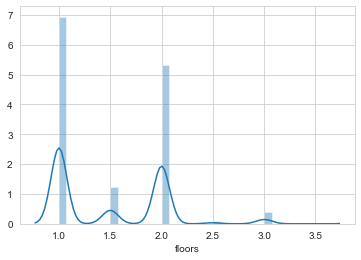

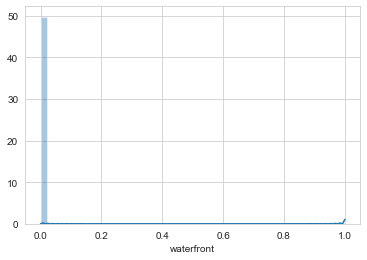

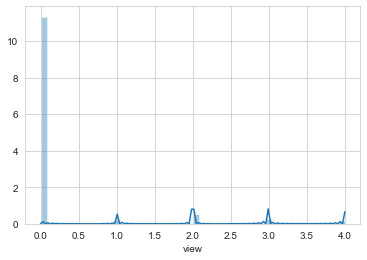

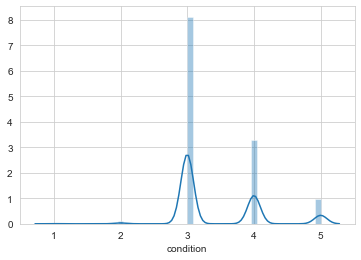

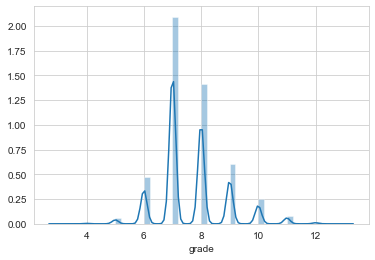

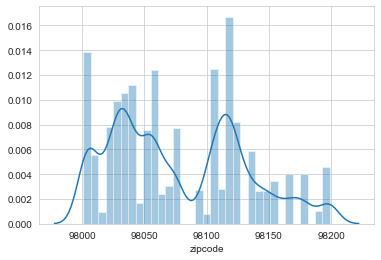

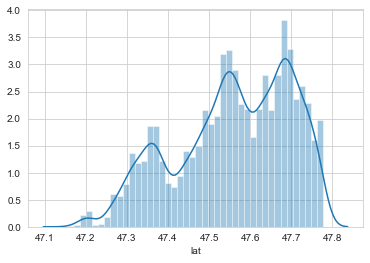

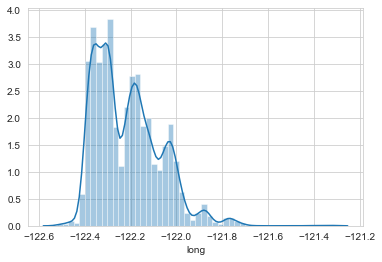

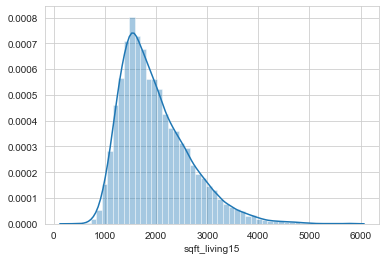

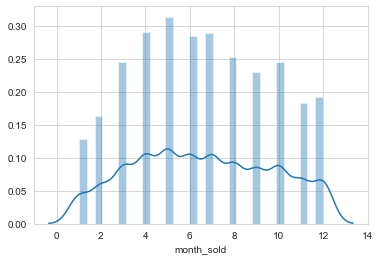

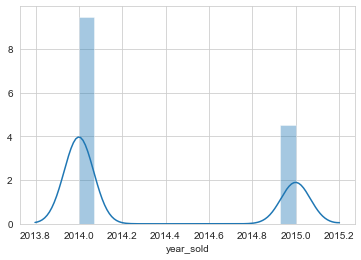

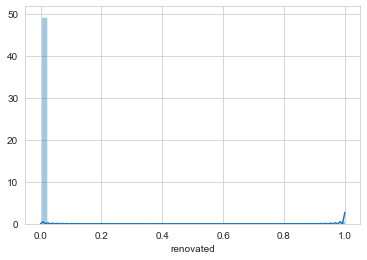

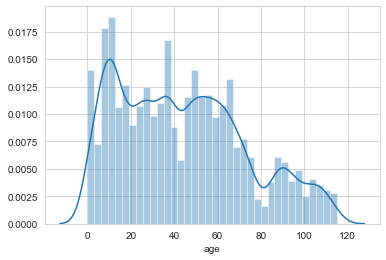

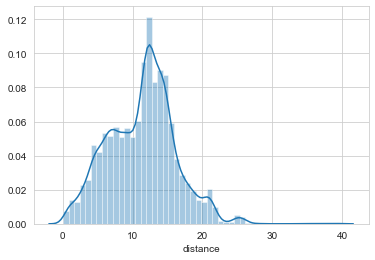

In [49]:
for col in df.columns:
    plt.subplots(1, 1)
    sns.distplot(df[col])

There are definitely outliers in our features. We will remove these to improve our residual normality.

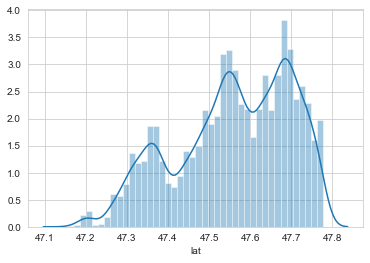

In [50]:
sns.distplot(df['lat'])

In [51]:
lat_df = pd.get_dummies(df.lat, prefix='lat', drop_first=True)
lat_df

,lat_47.1593,lat_47.1622,lat_47.1647,lat_47.1764,lat_47.1775,lat_47.1776,lat_47.1795,lat_47.1803,lat_47.1808,lat_47.184,...,lat_47.7766,lat_47.7767,lat_47.7768,lat_47.7769,lat_47.777,lat_47.7771,lat_47.7772,lat_47.7774,lat_47.7775,lat_47.7776
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
long_df = pd.get_dummies(df.long, prefix='long', drop_first=True)
long_df

,long_-122.515,long_-122.514,long_-122.512,long_-122.51100000000001,long_-122.509,long_-122.507,long_-122.506,long_-122.505,long_-122.50399999999999,long_-122.50299999999999,...,long_-121.40299999999999,long_-121.402,long_-121.36399999999999,long_-121.359,long_-121.352,long_-121.325,long_-121.321,long_-121.319,long_-121.316,long_-121.315
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df = df[df['bedrooms'] < 6]
df = df[df['bathrooms'] < 4.5]
df = df[df['sqft_lot'] < 20000]
df = df[df['distance'] < 25]
df = df[df['condition'] > 2]
df = df[df['grade'] > 4]
df = df[df['grade'] < 12]

In [54]:
model = linear_model(df)
model

Training Score: 0.76
Test Score: 0.76
Coefficients: [ 2.04164136e-02  1.23877587e-01 -7.53915248e-06  5.57044102e-02
  3.75358830e-01  7.00510096e-02  5.65144956e-02  1.91338921e-01
 -5.79594838e-04  1.37338667e+00 -2.36318259e-01  1.61222329e-04
  2.31107985e-03  6.32973413e-02  1.09010895e-01  4.04626274e-03
 -1.43095104e-02]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     2770.
Date:                Wed, 23 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:48:07   Log-Likelihood:                 196.85
No. Observations:               14832   AIC:                            -357.7
Df Residuals:                   14814   BIC:                            -220.8
Df Model:                          17 

Although it seems we have a decent model with an adjusted r-squared at .776, let's look at our feature correlation to price again.

In [55]:
X = df.drop(columns=['price'], axis=1)
y = df.price

correlation_list = []
for col in X.columns:
    correlation_list.append(pearsonr(X[col], y)[0])
    
correlations = {}
for i, j in zip(X.columns, correlation_list):
    correlations[i] = round(j, 2)
sorted_correlations = pd.DataFrame(sorted(correlations.items(), key=lambda x: x[1], reverse=True), columns=['feature', 'correlations'])
sorted_correlations['feature'] = sorted_correlations['feature'].astype('string')
sorted_correlations

,feature,correlations
0,grade,0.65
1,sqft_living15,0.57
2,lat,0.49
3,bathrooms,0.48
4,bedrooms,0.32
5,view,0.32
6,floors,0.29
7,waterfront,0.11
8,renovated,0.08
9,sqft_lot,0.03


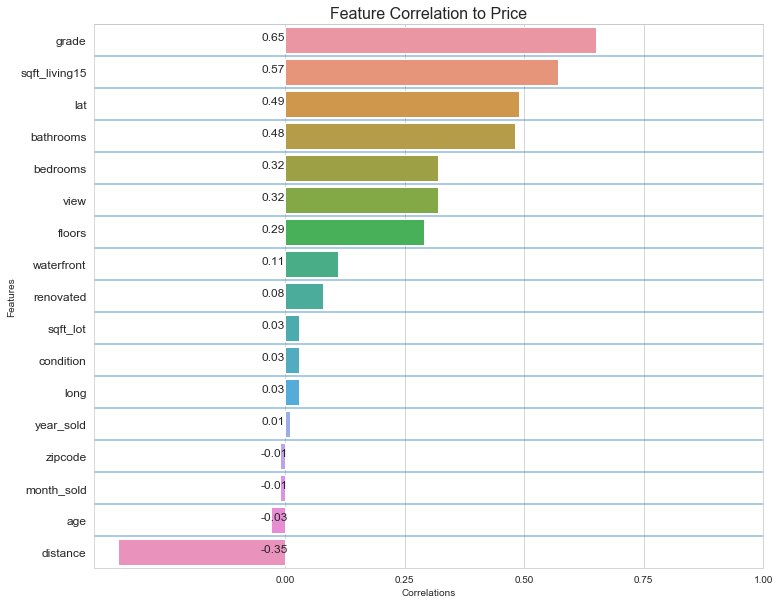

In [56]:
#Plot the feature correlation to price
plt.figure(figsize=(12, 10))
sns.set_style('whitegrid')
sns.barplot(sorted_correlations['correlations'], sorted_correlations['feature'])
plt.title('Feature Correlation to Price', fontsize=16)
plt.xlabel('Correlations')
plt.ylabel('Features')
plt.yticks(fontsize=12)
plt.xticks(np.linspace(0, 1, 5))
for ind, val in enumerate(sorted_correlations['correlations']):
    plt.text(x= -0.05, y= ind, s= val, fontsize=12)
    plt.axhline(ind - .5, alpha=0.5)
plt.show()

An odd result with our model is that bedrooms has a wrong sign, showing a negative coefficient rather than positive. The correlation is clearly positive, so this could potentially indicate multicollinearity or other errors with our model. In this case, we will just drop bedrooms and rebuild our model and determine results.

In [57]:
linreg = LinearRegression()

In [58]:
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(linreg, X, y, scoring='r2', cv=crossvalidation))

from itertools import combinations

interactions = []

feat_combinations = combinations(X.columns, 2)

data = X.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(linreg, data, y, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])

0
50
100
Top 3 interactions: [('lat', 'distance', 0.778), ('zipcode', 'long', 0.767), ('grade', 'long', 0.763)]


In [59]:
df['lat_x_distance'] = df['lat'] * df['distance']
df['grade_x_long'] = df['grade'] * df['long']

In [60]:
df.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,month_sold,year_sold,renovated,age,distance,lat_x_distance,grade_x_long
0,12.309982,3,1.00,5650,1.0,0.0,0.0,3,7,98178,47.5112,-122.257,1340,10.0,2014.0,0,60,6.8,323.07616,-855.799
1,13.195614,3,2.25,7242,2.0,0.0,0.0,3,7,98125,47.7210,-122.319,1690,12.0,2014.0,0,64,14.4,687.18240,-856.233
2,12.100712,2,1.00,10000,1.0,0.0,0.0,3,6,98028,47.7379,-122.233,2720,2.0,2015.0,0,82,13.4,639.68786,-733.398
3,13.311329,4,3.00,5000,1.0,0.0,0.0,5,7,98136,47.5208,-122.393,1360,12.0,2014.0,0,50,12.7,603.51416,-856.751
4,13.142166,3,2.00,8080,1.0,0.0,0.0,3,8,98074,47.6168,-122.045,1800,2.0,2015.0,0,28,5.7,271.41576,-976.360


In [61]:
X = df.drop(columns=['price', 'sqft_lot', 'zipcode'], axis=1)
y = df.price

#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)

#Fit the model
linreg = LinearRegression()
model = linreg.fit(X_train, y_train)
model

#View model accuracy
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

#View model summary in statsmodels
X_train = sm.add_constant(X_train)
smmodel = sm.OLS(y_train, X_train).fit()
smmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     3108.
Date:                Wed, 23 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:48:15   Log-Likelihood:                 856.58
No. Observations:               14832   AIC:                            -1677.
Df Residuals:                   14814   BIC:                            -1540.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -116.6467     19.214     -6.071      0.000    -154.308     -78.985
bedrooms           0.0174      0.003      6.279      0.000       0.012       0.023
bathrooms          0.1211      0.004     28.375      0.000       0.113       0.129
floors             0.0746      0.004     16.823      0.000       0.066       0.083
waterfront         0.3525      0.034     10.232      0.000       0.285       0.420
view               0.0641      0.003     20.670      0.000       0.058       0.070
condition          0.0518      0.003     15.576      0.000       0.045       0.058
grade            -27.0673      1.763    -15.351      0.000     -30.524     -23.611
lat                3.6016      0.061     58.791      0.000       3.482       3.722
long               1.4344      0.111     12.970      0.000       1.218       1.651
sqft_living15      0.0002   4.78e-06     34.855      0.000       0.000       0.000
month_sold         0.0024      0.001      2.453      0.014       0.000       0.004
year_sold          0.0653      0.006     10.092      0.000       0.053       0.078
renovated          0.0995      0.017      5.995      0.000       0.067       0.132
age                0.0037   9.66e-05     38.104      0.000       0.003       0.004
distance           7.1271      0.189     37.686      0.000       6.756       7.498
lat_x_distance    -0.1503      0.004    -37.768      0.000      -0.158      -0.143
grade_x_long      -0.2229      0.014    -15.448      0.000      -0.251      -0.195
==============================================================================
Omnibus:                      246.604   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              493.701
Skew:                          -0.022   Prob(JB):                    6.23e-108
Kurtosis:                       3.893   Cond. No.                     3.08e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

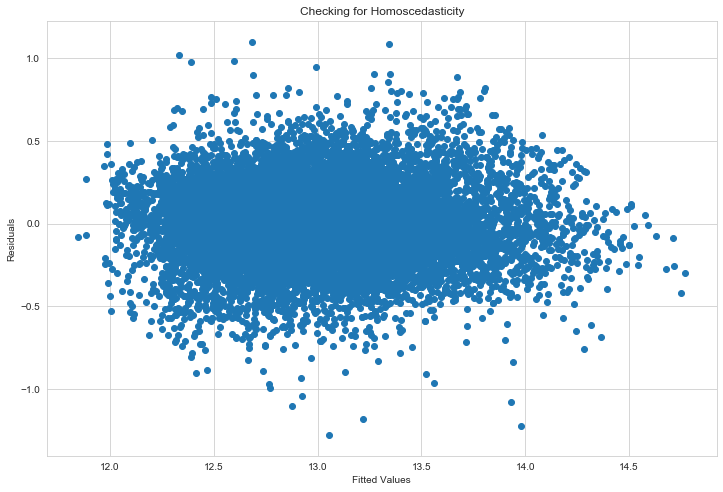

In [62]:
plt.figure(figsize=(12, 8))
plt.scatter(train_preds, smmodel.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Checking for Homoscedasticity')
plt.show()

In [63]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(smmodel.resid, smmodel.model.exog)
dict(zip(name, test))

{'Lagrange multiplier statistic': 355.7790568513558,
 'p-value': 3.098060353973757e-65,
 'f-value': 21.416504831875123,
 'f p-value': 4.3832462949567057e-66}

There is no clear pattern in the data, so our residuals our homoscedastic.

In [64]:
y = np.exp(y)
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 18540, dtype: float64

In [65]:
linreg.coef_

array([ 1.73564616e-02,  1.21062172e-01,  7.46044409e-02,  3.52526439e-01,
        6.40917871e-02,  5.18249313e-02, -2.70673371e+01,  3.60162148e+00,
        1.43439297e+00,  1.66754441e-04,  2.38548277e-03,  6.52875784e-02,
        9.95272196e-02,  3.68012017e-03,  7.12711749e+00, -1.50332881e-01,
       -2.22861836e-01])

# Final Model Results

Multiple regression analysis was used to test if certain variables significantly predicted the sale price of homes in King County, Washington. The results of the regression indicated that 18 predictors explained 77.9% of the variance (R2= 0.779, F=2,912, p< 0.01). The sale price is equal to -142.59 + 256.86(age) + 339.19(bmi) + 131.31(sex_female) + 23,850(smoker_yes) + 474.50(number of children) – 352.96(region_northwest) – 1,035.02(region_southeast) – 960.05(region_soughtwest), where sex_female is coded as 1= female, 0= male; smoker_yes is coded as 1= smoker, 0= non-smoker; region_[location] is coded as 1= in region, 0= not in region. All of the independent variables used in the model were significant predictors of insurance premium charge, except for sex